In [4]:
# Capston Instacart Market Basket Analysis
#Instacart is a U.S. based company that provides same-day grocery delivery service. 
#It provides the customers an option to choose the grocery store they want their groceries from, 
#browse through the item list, select the items and get it hand-delivered by a personal shopper. 
#The company offers the services both through their website as well their app.

#They have over 3 million transactional data of multiple shoppers located across the United States. 
#Instacart wants to leverage this data to build a model that can predict which previously purchased products 
#will be in a user’s next order. 
#This will help the company strategize where to show the previously ordered items on their page or app.  
#The model will also help recommend items for users while they are browsing.


# Data Wrangling for Instacart Market Basket Analysis
#reading the files one by one

In [61]:
#Step 1 - Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [6]:
# Step 2 - Import the files
#files provided - aisles, products,departments,orders_prior,orders

#aisles
aisles = pd.read_csv('aisles.csv')
#importing the departments file
departments= pd.read_csv('departments.csv')
# importing the products file
#products
products =pd.read_csv("products.csv")
#orders_prior
#importing the orders_prior file
orders_prior =pd.read_csv("order_products__prior.csv")
#5
#importing the orders_train file
order_train = pd.read_csv('order_products__train.csv')
#6 orders
orders = pd.read_csv('orders.csv')

In [74]:
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [7]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [8]:
printmd("**Data Exploration**")

**Data Exploration**

In [9]:
# we have already noticed that there are three files with order information - order_priors, order_train and orders
# we need to find the difference between these three files
#order_train.info()  #1,384,617 rows
#orders_prior.info() #32,434,489 rows
#orders.info()       #3,421,083 rows

# it looks like orders_prior is huge dataset which has all the prior customer orders.
#checking orders.info()
count_total = orders.groupby("eval_set")["user_id"].agg(np.size)
count_total

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

In [10]:
#lets evaluate each table one by one
printmd("**ORDERS Table**")

**ORDERS Table**

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [8]:
#lets check how many unique users does this table has
count_total = orders.groupby("user_id").agg(np.size)
count_total
#there are 206209 users

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,11,11,11,11,11,11.0
2,15,15,15,15,15,15.0
3,13,13,13,13,13,13.0
4,6,6,6,6,6,6.0
5,5,5,5,5,5,5.0
6,4,4,4,4,4,4.0
7,21,21,21,21,21,21.0
8,4,4,4,4,4,4.0
9,4,4,4,4,4,4.0


In [12]:
#lets check the eval set column
# this column indicates if the order is part of the train,test or prior
count_total = orders.groupby("eval_set")["user_id"].agg(np.size)
count_total

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

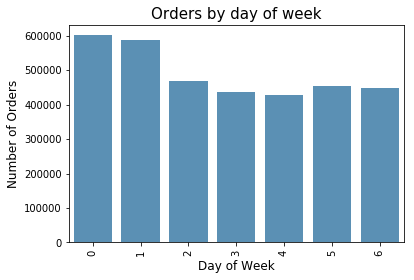

**Most of the orders are placed on Sunday and Monday**

In [13]:
#When do people place most of their orders?
# checking dow - day of week variable
cnt_1 = orders.order_dow.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Orders by day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
printmd("**Most of the orders are placed on Sunday and Monday**")

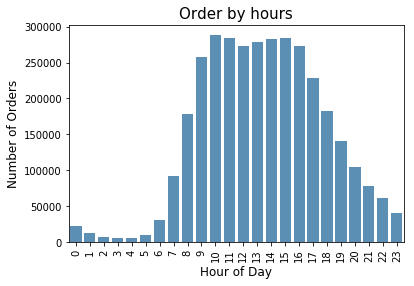

**Most of the orders are placed between 9 am and 5 pm**

In [14]:
# checking dow - day of week variable
cnt_1 = orders.order_hour_of_day.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.title('Order by hours', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
printmd("**Most of the orders are placed between 9 am and 5 pm**")

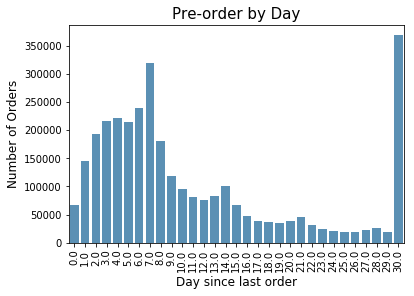

**When are orders placed again? We can see a spike on 7,14 and 30th day**

In [15]:
# days since prior order
cnt_1 = orders.days_since_prior_order.value_counts()
sns.barplot(cnt_1.index, cnt_1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day since last order', fontsize=12)
plt.title('Pre-order by Day', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
printmd("**When are orders placed again? We can see a spike on 7,14 and 30th day**")


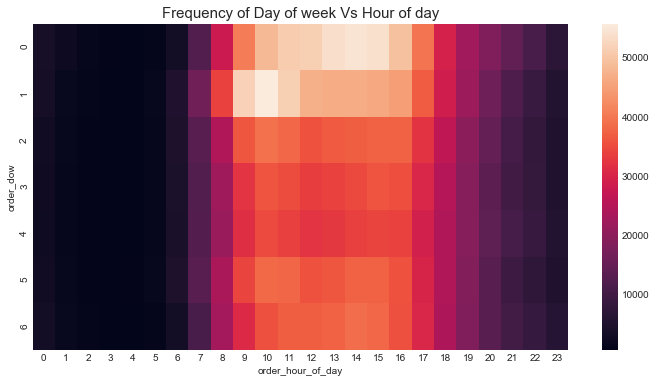

We get most orders on Saturday evening and sundy mornings

In [89]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day",fontsize=15)
plt.show()
printmd("We get most orders on Saturday evening and sundy mornings")

In [16]:
products.info()
order_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [17]:
#looking at the orders__train table
# lets look at the trends of the products and see which have been reordered the most amount of time
# lets first merge order_train with products
orders_train_p= pd.merge(order_train,products,left_on = 'product_id'
                       ,right_on = 'product_id',how='left',suffixes = ('_x', '_y'))

In [18]:
orders_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 7 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
product_name         1384617 non-null object
aisle_id             1384617 non-null int64
department_id        1384617 non-null int64
dtypes: int64(6), object(1)
memory usage: 84.5+ MB


In [19]:
#lets also join by aisle and departments table to get other information
orders_train_pa=pd.merge(orders_train_p,aisles,left_on='aisle_id',
                         right_on = 'aisle_id',how='left',suffixes = ('_x', '_y'))
orders_train_pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 8 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
product_name         1384617 non-null object
aisle_id             1384617 non-null int64
department_id        1384617 non-null int64
aisle                1384617 non-null object
dtypes: int64(6), object(2)
memory usage: 95.1+ MB


In [20]:
orders_train_pad=pd.merge(orders_train_pa,departments,left_on='department_id',
                         right_on = 'department_id',how='left',suffixes = ('_x', '_y'))
orders_train_pad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 9 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
product_name         1384617 non-null object
aisle_id             1384617 non-null int64
department_id        1384617 non-null int64
aisle                1384617 non-null object
department           1384617 non-null object
dtypes: int64(6), object(3)
memory usage: 105.6+ MB


In [21]:
orders_train_pad.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [23]:
printmd("**Top products that are reorderd the most**")
#subsetting the reorderd products
orders_train_pad_s = orders_train_pad.loc[orders_train_pad['reordered'] == 1]
orders_train_pad_s.reordered.unique()


**Top products that are reorderd the most**

array([1])

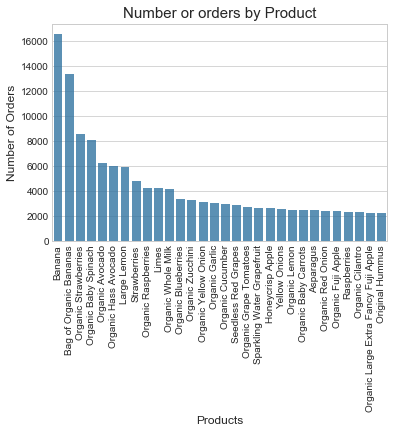

**Banana has been reordered the most**

In [101]:
#orders_train_c1 = orders_train_pad_s.groupby('product_name')['order_id'].count()
#print(orders_train_c1)
orders_train_c1 = orders_train_pad_s['product_name'].value_counts().head(30)
sns.barplot(orders_train_c1.index, orders_train_c1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Products', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number or orders by Product",fontsize=15)
plt.show()
printmd("**Banana has been reordered the most**")

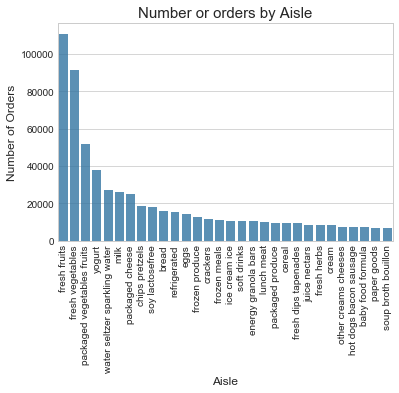

**Fresh fruits have been reordered the most**

In [102]:
#orders_train_c1 = orders_train_pad_s.groupby('product_name')['order_id'].count()
#print(orders_train_c1)
orders_train_c1 = orders_train_pad_s['aisle'].value_counts().head(30)
sns.barplot(orders_train_c1.index, orders_train_c1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number or orders by Aisle",fontsize=15)
plt.show()
printmd("**Fresh fruits have been reordered the most**")

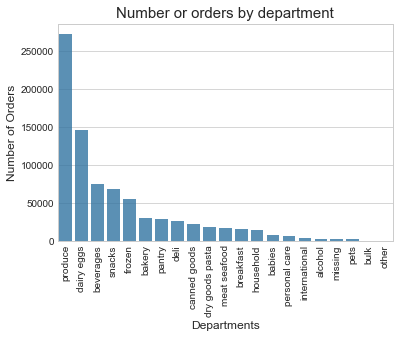

**Most of the reorders are from produce department**

In [104]:
#orders_train_c1 = orders_train_pad_s.groupby('product_name')['order_id'].count()
#print(orders_train_c1)
orders_train_c1 = orders_train_pad_s['department'].value_counts().head(30)
sns.barplot(orders_train_c1.index, orders_train_c1.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number or orders by department",fontsize=15)
plt.show()
printmd("**Most of the reorders are from produce department**")

In [69]:
orders_train_pad_s.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs
9,36,19660,2,1,Spring Water,115,7,water seltzer sparkling water,beverages


/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


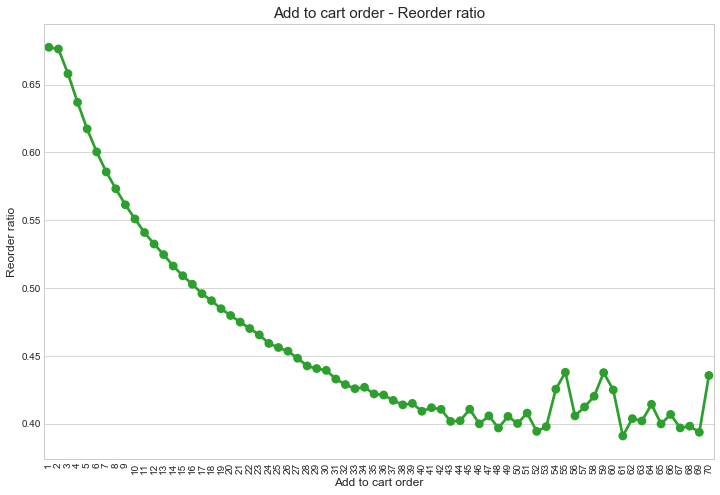

In [79]:
orders_prior["add_to_cart_order_mod"] = orders_prior["add_to_cart_order"].copy()
orders_prior["add_to_cart_order_mod"].ix[orders_prior["add_to_cart_order_mod"]>70] = 70
grouped_df = orders_prior.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
#if we look at the previous orders information table, we see that the quicker a product is added to the cart, the more likely it is going to be reorderd again. 

/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/abhinavmathur/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

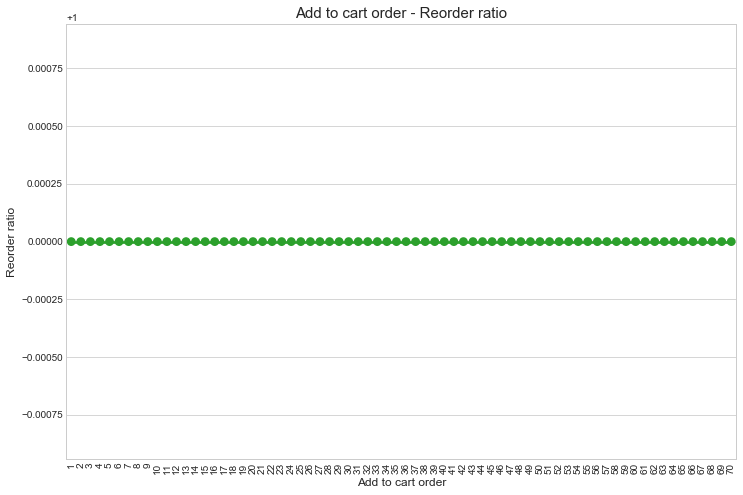

In [80]:
orders_train_pad_s["add_to_cart_order_mod"] = orders_train_pad_s["add_to_cart_order"].copy()
orders_train_pad_s["add_to_cart_order_mod"].ix[orders_train_pad_s["add_to_cart_order_mod"]>70] = 70
grouped_df = orders_train_pad_s.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
# we don't see the trend in the orders table which have tthe last order from the customers only.

In [97]:
order_train.info()
orders_all = pd.merge(order_train,orders, left_on ='order_id',right_on = 'order_id',how='left',suffixes = ('_x', '_y'))
orders_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 10 columns):
order_id                  1384617 non-null int64
product_id                1384617 non-null int64
add_to_cart_order         1384617 non-null int64
reordered                 1384617 non-null int64
user_id                   1384617 non-null int64
eval_set                  1384617 non-null object
order_number              1384617 non-null int64
order_dow                 1384617 non-null int64
order_hour_of_day         1384617 non-null int64
days_since_prior_order    1384617 non-null float64
dtypes: float64(1), int64(8), object(1)
memory usage: 116.2+ MB


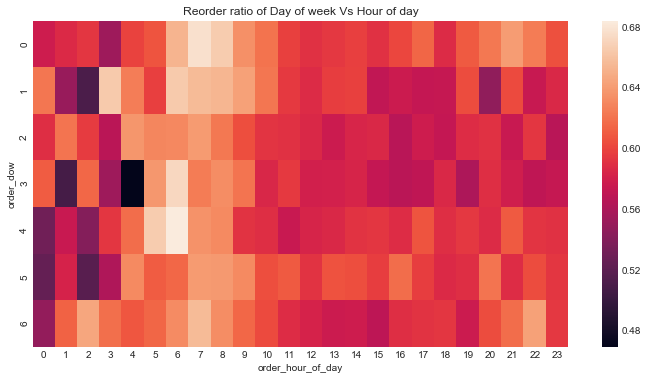

In [98]:
grouped_df = orders_all.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder by Day of week Vs Hour of day")
plt.show()
printmd("Reorder happens during Sunday and Saturday mornings")